#Loading dependencies

In [26]:
import skimage as ski
from skimage import io, color, img_as_float, exposure
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#Neighborhood processing

Neighborhood processing in image processing involves modifying a pixel's value based on the values of its neighboring pixels. So far we have worked on point processing where we didn't consider the pixel neighborhood while updating a pixel's value.

Neighborhood processing uses kernels that slides over the image and updates the image accounting for the local structure. This process is called filtering and this is the foundation of convolutional neural networks that we will study in Lab 7. Filtering is done by either cross-correlating or convolving the filter array with the image array. Since, filtering is a concept of signal processing, convolving is more accurate and it sticks to the roots. Convolutional neural network gets its name from this convolution operation. However, in modern implementation, we mostly use the cross-correlation operation. In fact, convolutional neural networks also use the cross-correlation operation.

The animations below shows how filtering is achieved -

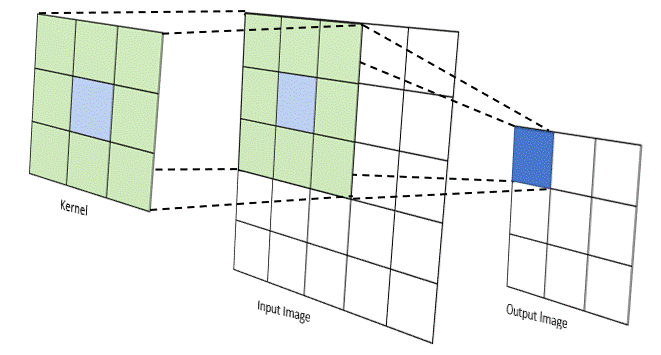

*Image collected from https://medium.com/@timothy_terati/image-convolution-filtering-a54dce7c786b*

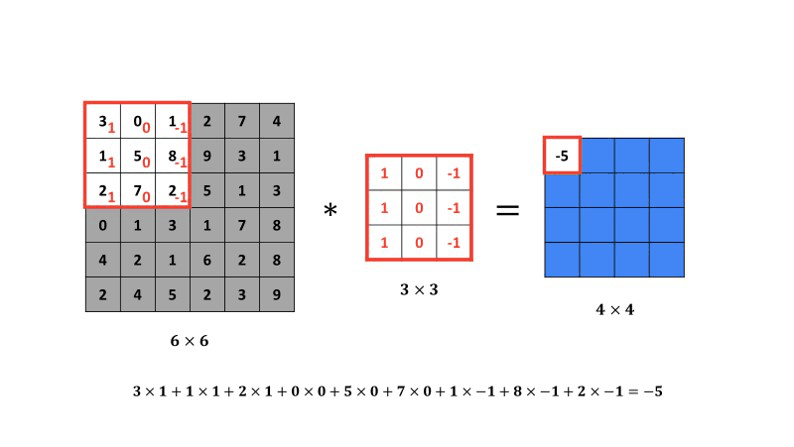

*Image collected from https://datahacker.rs/edge-detection/*

All the operations shown in the gifs are cross-correlation. For convolution the filter is flipped 180° at first and then a cross-correlation operation is performed between the image and the flipped filter.

# Getting started with filtering operation

For now, lets keep things simple. Lets take a grayscale image and apply a filter on it -

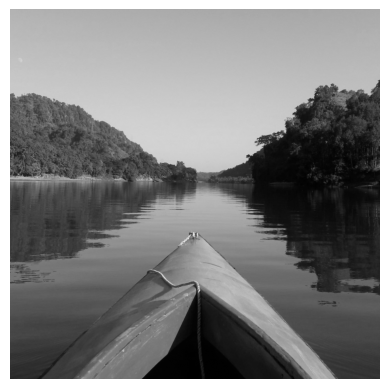

(1448, 1448)


In [27]:
I = io.imread("sample_1.jpg")
I = img_as_float(I)
I = color.rgb2gray(I)

plt.imshow(I, cmap = 'gray')
plt.axis("off")
plt.show()

print(I.shape)

Now, we need to define a kernel array. Lets use a $25\times 25$ filter that takes all the pixels in the radius of 12, $(k-1)/2$, pixels from the center and averages them. Since each of the image patches are multiplied elementwise with the kernel and them summed up. So to get the average of all the pixels in the neighborhood, we can just do this -

$$k =
\frac{1}{25^2}\begin{bmatrix} 1\ 1\ .\ .\ .\ 1 \\
1\ 1\ .\ .\ . \ 1 \\
.\ .\ .\ .\ .\ . \\
.\ .\ .\ .\ .\ . \\
1\ 1\ .\ .\ .\ 1 \\ \end{bmatrix}$$

What will this acheive? It will blur out the image.

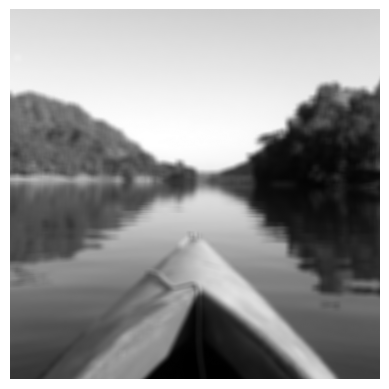

(1424, 1424)


In [28]:
k = np.ones([25,25])/625.0

I_filtered_corr = signal.correlate(I, k, mode='valid')

plt.imshow(I_filtered_corr, cmap='gray')
plt.axis('off')
plt.show()

print(I_filtered_corr.shape)

**Observations -**

1. We applied the filter by correlating the image with our kernel. We could have applied the filter by convolving as well. To apply convolution, we need to call `signal.convolve()`.

2. The image did get blurry as per our expectations.

3. The dimensions got reduced by 1448 - 1424 = 24 which is equal to $k-1$.

Lets see the convolution version for this filter -

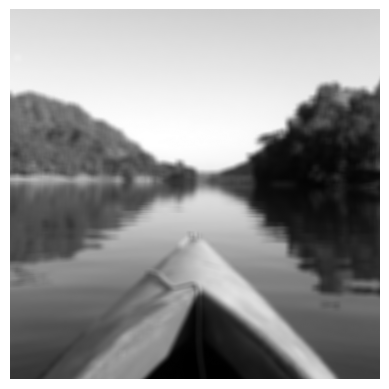

(1424, 1424)


In [29]:
I_filtered_conv = signal.convolve(I, k, mode='valid')

plt.imshow(I_filtered_conv, cmap='gray')
plt.axis('off');
plt.show()

print(I_filtered_conv.shape)

The images look the same. They even have the same dimensions. Lets check if they are the same pictures.

In [30]:
print((I_filtered_corr == I_filtered_conv).all())

True


So, they are the same picture. Will it be the same for all filters? To check lets try a new filter -

[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


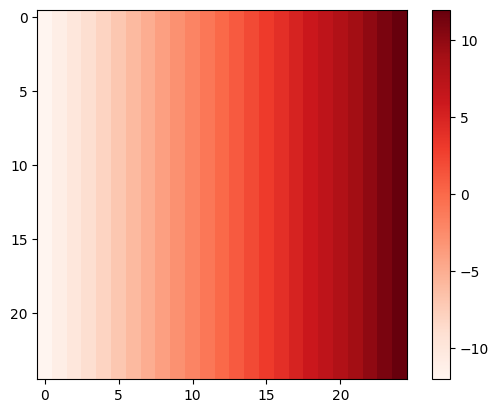

In [31]:
k = np.zeros([25, 25])
row = np.arange(-12, 13)
print(row)
for i in range(25):
  k[i, :] = row
plt.imshow(k, cmap = "Reds")
plt.colorbar()
plt.show()

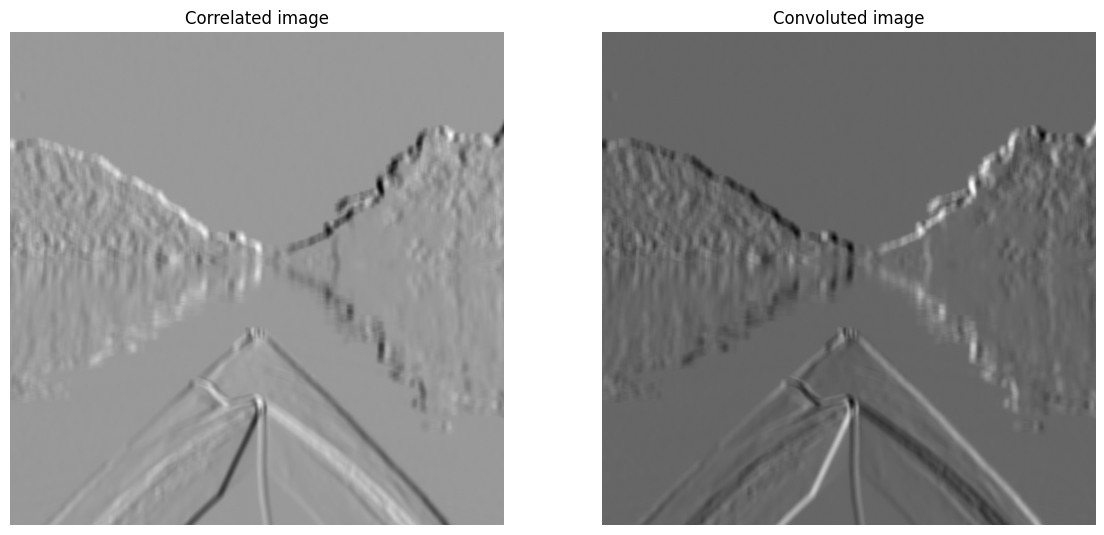

Correlated image shape -  (1424, 1424)
Convoluted image shape -  (1424, 1424)


In [32]:
I_filtered_corr = signal.correlate(I, k, mode='valid')
I_filtered_conv = signal.convolve(I, k, mode='valid')

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(I_filtered_corr, cmap = 'gray')
ax1.title.set_text("Correlated image")
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(I_filtered_conv, cmap = 'gray')
ax2.title.set_text("Convoluted image")
ax2.axis("off")

plt.show()

print("Correlated image shape - ", I_filtered_corr.shape)
print("Convoluted image shape - ", I_filtered_conv.shape)

Although the the resultant images have the same dimensions, they are looking a bit different. Looks a bit flipped on the y-axis. Lets check if they are truly different -

In [33]:
print((I_filtered_corr == I_filtered_conv).all())

False


So, why does the convolution operation produce similar results for one filter while producing different result for a different filter?

The reasoning is left up to you to understand.

#Dimensionality reduction and padding

In the previous operations, we noticed that the dimensions are getting reduced by $k-1$ pixels. But why?

Since, the kernels are centered on the pixels, the corner pixels get excluded. We lose $(k-1)/2$ pixels on all sides. See the next picture -

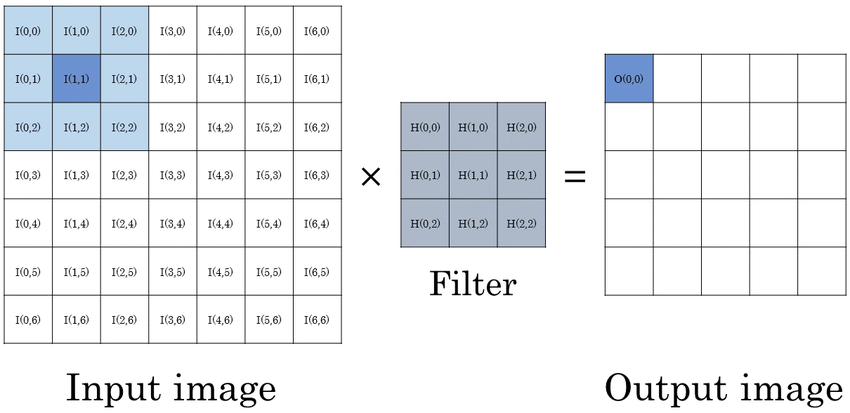

*Image collected from http://dx.doi.org/10.48550/arXiv.1708.00052

We can avoid this by padding our original image increasing initial dimensions by $(k-1)/2$ on all sides so that filtering balances out the dimensions. We can pad our images using `np.pad()` function -

In [34]:
A = np.array([1,2,3,4,5])
np.pad(A, (2, 3), 'constant', constant_values = 0)

array([0, 0, 1, 2, 3, 4, 5, 0, 0, 0])

For this example we have padded with 0s. But padding can be done in different ways. Lets visualize it directly on the RGB version of our kayak image -

In [35]:
img = io.imread("sample_1.jpg")
img = img_as_float(img)

pad_width = 200

img_white_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=1)
img_zero_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
img_constant_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=200/255)
img_edge_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="edge")
img_mirror_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="reflect")
img_linear_ramp_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="linear_ramp")

`pad_width` expects an argument of the format -
```
pad_width = [(dim_0_left_pad, dim_0_right_pad),
            (dim_1_left_pad, dim_1_right_pad),
            .................................,
            (dim_n_left_pad, dim_n_right_pad)]
```

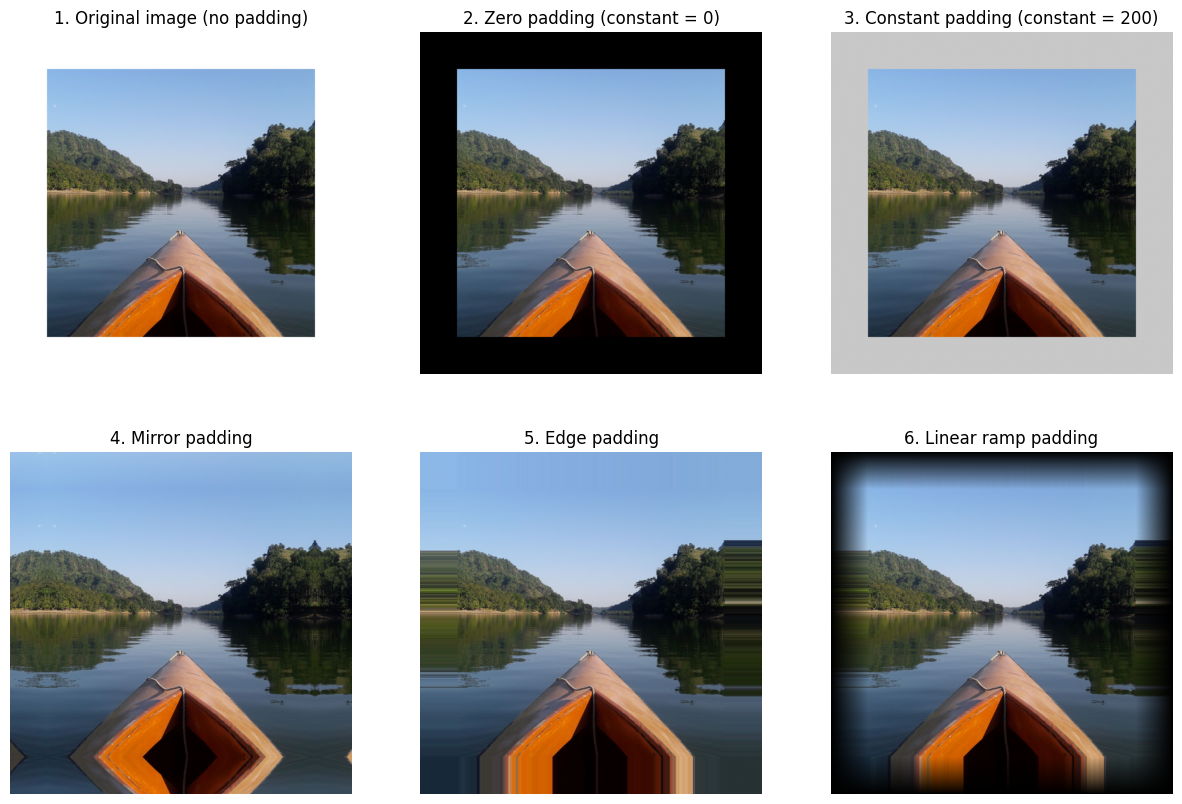

In [36]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img_white_padded)
# referring white_padded as original to show all the images in the same scale,
# might not work if your notebook background is not white! :3
ax1.title.set_text('1. Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(img_zero_padded)
ax2.title.set_text('2. Zero padding (constant = 0)')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(img_constant_padded)
ax3.title.set_text('3. Constant padding (constant = 200)')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(img_mirror_padded)
ax4.title.set_text('4. Mirror padding')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(img_edge_padded)
ax5.title.set_text('5. Edge padding')
ax5.axis("off")

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(img_linear_ramp_padded)
ax6.title.set_text('6. Linear ramp padding')
ax6.axis("off")

plt.show()

You can read more about it on https://numpy.org/doc/stable/reference/generated/numpy.pad.html.

Most popular type of padding is zero padding. Lets try out zero pading on our grayscale variant of the image and filter it again. Remember, we need to pad each side by $(k-1)/2$ to preserve dimensionss.

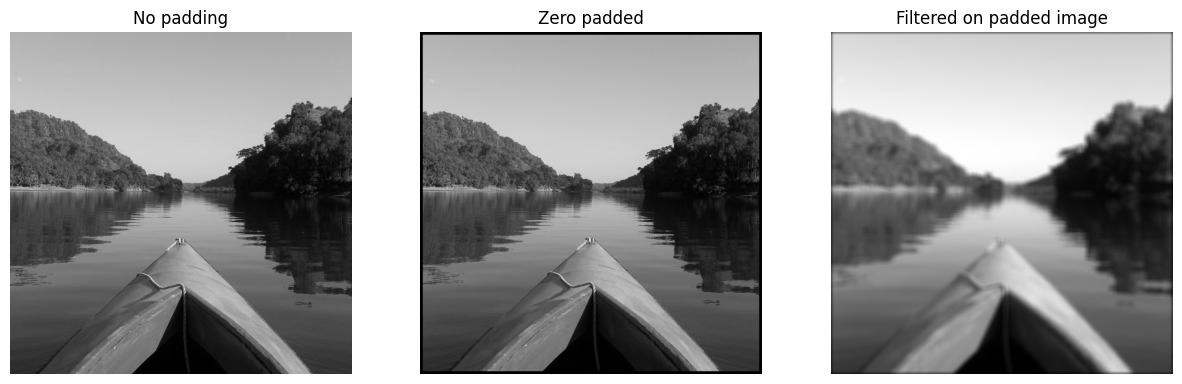

Original dimensions -  (1448, 1448)
Padded dimensions -  (1472, 1472)
Filtered dimensions -  (1448, 1448)


In [37]:
k = np.ones([25,25])/625.0

pad_width = (25-1)//2

I_padded = np.pad(I, pad_width=[(pad_width, pad_width),(pad_width, pad_width)], mode="constant", constant_values=0)

I_filtered = signal.correlate(I_padded, k, mode='valid')

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(I, cmap = 'gray')
ax1.title.set_text('No padding')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(I_padded, cmap = 'gray')
ax2.title.set_text('Zero padded')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(I_filtered, cmap = 'gray')
ax3.title.set_text('Filtered on padded image')
ax3.axis("off")

plt.show()

print("Original dimensions - ", I.shape)
print("Padded dimensions - ", I_padded.shape)
print("Filtered dimensions - ", I_filtered.shape)

❗For the rest of this course, we will use zero padding, unless otherwise specified.❗

❗❗You don't have to separately pad images like this, you can just use `mode='same'` in `signal.correlate()` and `signal.convolve()` to acheieve the same result.❗❗

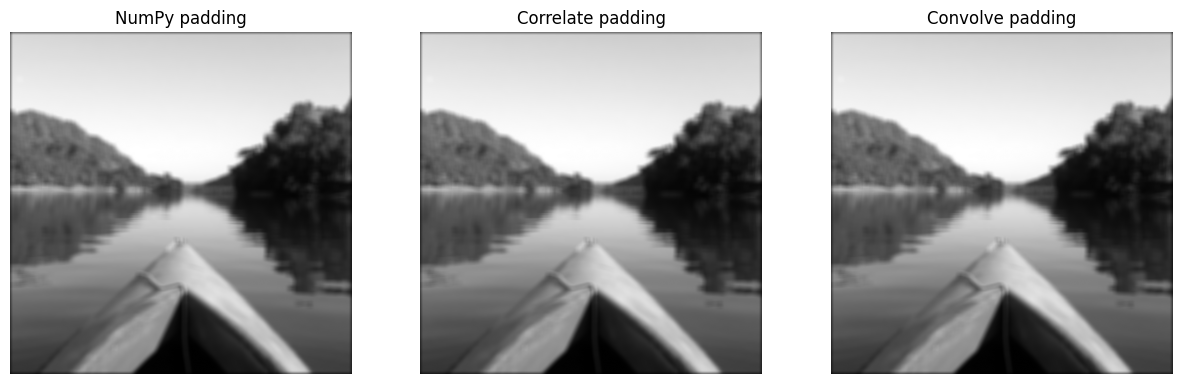

NumPy padded filtered dimensions -  (1448, 1448)
Correlate padded filtered dimensions -  (1448, 1448)
Convolve padded filtered dimensions -  (1448, 1448)


In [38]:
I_filtered_corr = signal.correlate(I, k, mode='same')
I_filtered_conv = signal.convolve(I, k, mode='same')

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(I_filtered, cmap = 'gray')
ax1.title.set_text('NumPy padding')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(I_filtered_corr, cmap = 'gray')
ax2.title.set_text('Correlate padding')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(I_filtered_conv, cmap = 'gray')
ax3.title.set_text('Convolve padding')
ax3.axis("off")

plt.show()

print("NumPy padded filtered dimensions - ", I_filtered.shape)
print("Correlate padded filtered dimensions - ", I_filtered_corr.shape)
print("Convolve padded filtered dimensions - ", I_filtered_conv.shape)

# Odd kernels vs even kernels

If you have noticed, we have only designed kernels that are odd in size. We haven't worked with even kernels. Even kernels are 'odd'. They do not have a center point which messes with our understanding of the filtering operation. For maintaining dimensionality, the padding needs to be asymmetric too. In practice, we never use even sized filters. While it is possible to use even kernels, in practice we will not use even kernels.

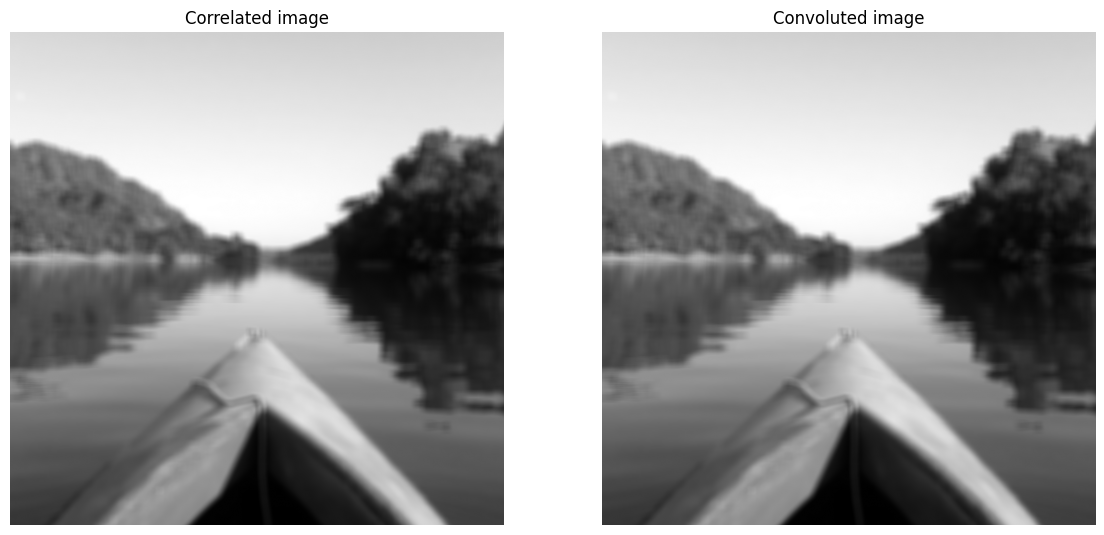

Correlated image shape -  (1425, 1425)
Convoluted image shape -  (1425, 1425)


In [39]:
k = np.ones([24,24])/(24*24)

I_filtered_corr = signal.correlate(I, k, mode='valid')
I_filtered_conv = signal.convolve(I, k, mode='valid')

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(I_filtered_corr, cmap = 'gray')
ax1.title.set_text("Correlated image")
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(I_filtered_conv, cmap = 'gray')
ax2.title.set_text("Convoluted image")
ax2.axis("off")

plt.show()

print("Correlated image shape - ", I_filtered_corr.shape)
print("Convoluted image shape - ", I_filtered_conv.shape)

The dimension reduced from 1448 to 1425, a 23 pixel reduction, still a $k-1$ reduction.

# Gaussian kernel, a better blurring kernel and 3D filtering

In [40]:
def gaussian_kernel(stdev=1, size=10):
    x = np.linspace(-size // 2, size // 2, size)
    gaussian1dkernel = np.exp(-0.5 * (x / stdev)**2)
    gaussian1dkernel /= np.sum(gaussian1dkernel)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel) #outer represents outer product
    return kernel / np.sum(kernel)

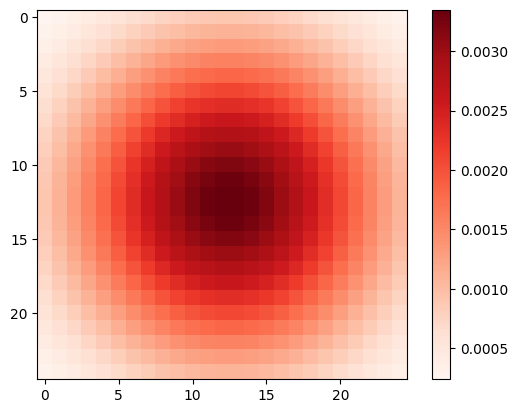

In [41]:
# kernel shape
k = 25

# standard deviation
spread = 8

# define kernel
kernel = gaussian_kernel(spread, k)
plt.imshow(kernel, cmap = "Reds")
plt.colorbar()
plt.show()

So closer neighbors get higher priority in Gaussian filter.

Lets see its effect on our Kayak image compared to our previous blurring kernel, a box kernel. For filtering 3D image, we just have to repeat the same filter on all the channels.

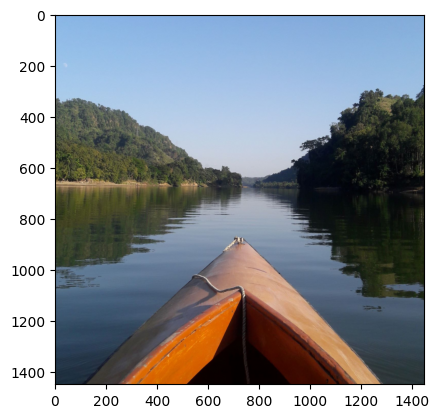

In [42]:
plt.imshow(img)

In [43]:
k_all = [5, 55, 205]

filtered_img_all_box = np.stack((np.zeros_like(img),)*len(k_all), axis=-1)

spread = 9

for i, k_unique in enumerate(k_all):
  kernel = np.ones([k_unique,k_unique])/(k_unique*k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_box[:,:,j, i] = np.clip(signal.correlate(img[:,:,j], kernel, mode='same', method='auto'), 0, 1)

filtered_img_all_gaussian = np.stack((np.zeros_like(img),)*len(k_all), axis=-1)

for i, k_unique in enumerate(k_all):
  kernel = gaussian_kernel(spread, size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_gaussian[:,:,j, i] = np.clip(signal.correlate(img[:,:,j], kernel, mode='same', method='auto'), 0, 1)

In [44]:
# print(filtered_img_all_box.shape)

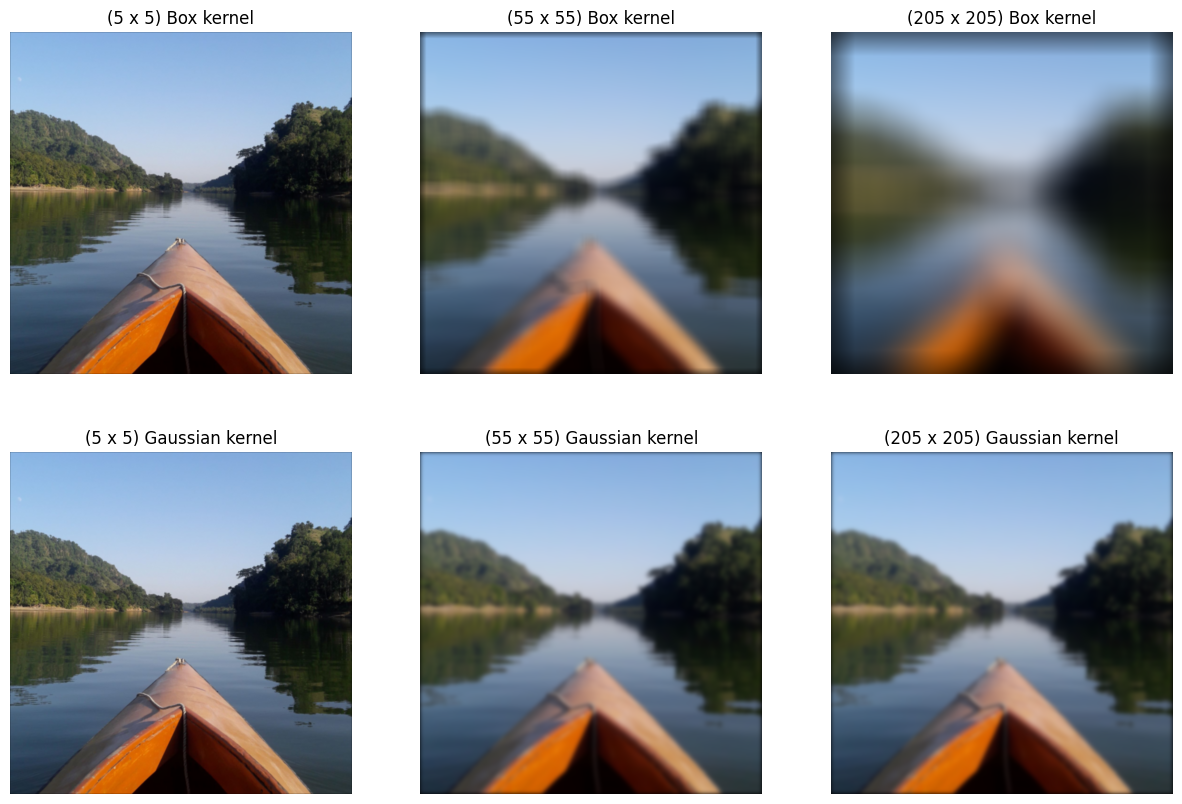

In [45]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(filtered_img_all_box[:,:,:,0])
ax1.title.set_text('(5 x 5) Box kernel')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(filtered_img_all_box[:,:,:,1])
ax2.title.set_text('(55 x 55) Box kernel')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(filtered_img_all_box[:,:,:,2])
ax3.title.set_text('(205 x 205) Box kernel')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(filtered_img_all_gaussian[:,:,:,0])
ax4.title.set_text('(5 x 5) Gaussian kernel')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(filtered_img_all_gaussian[:,:,:,1])
ax5.title.set_text('(55 x 55) Gaussian kernel')
ax5.axis("off")

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(filtered_img_all_gaussian[:,:,:,2])
ax6.title.set_text('(205 x 205) Gaussian kernel')
ax6.axis("off")

plt.show()

#Median filter

Remember the old grainy grayscale images? The grains are called salt and pepper noise. They require median filters to be cleaned. Gaussian filter doesn't work on them. First lets add salt and pepper noise to our grayscale kayak image. Then we will try to clean it using Gaussian blur. Then we will apply median filter.

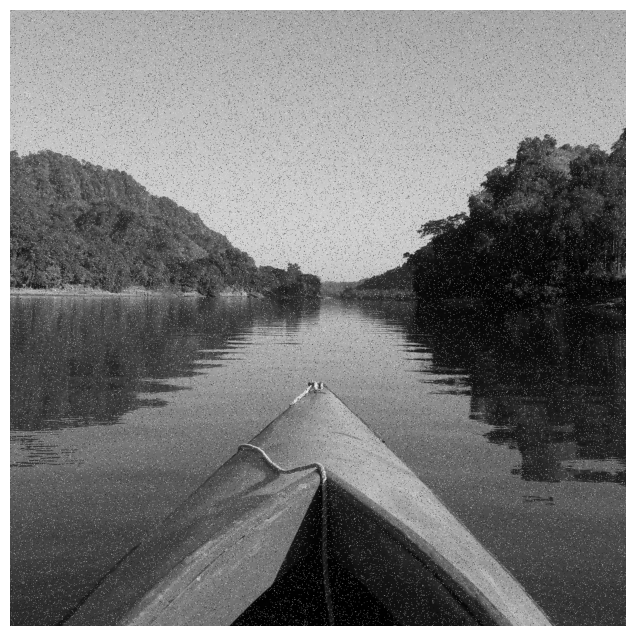

In [46]:
# Salt-and-pepper noise exists only for grayscale images
I = color.rgb2gray(img)

noisy_image_sp = ski.util.random_noise(I, mode='s&p')

plt.figure(figsize=(10,8))
plt.imshow(noisy_image_sp, cmap='gray')
plt.axis("off")
plt.show()

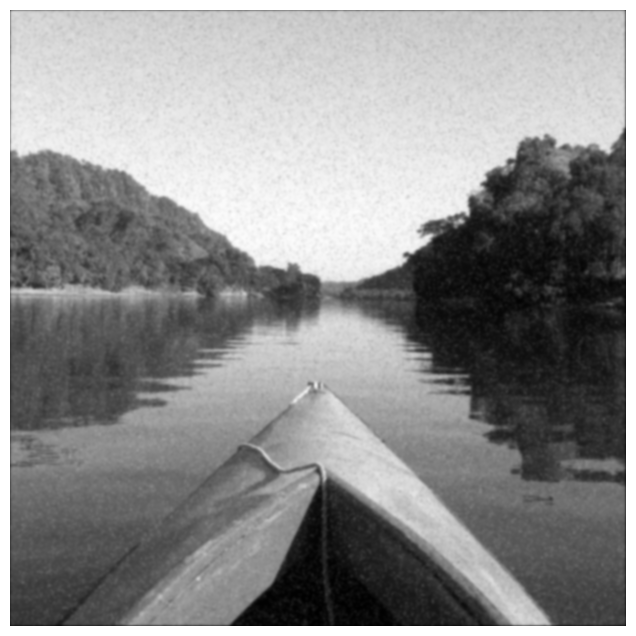

In [47]:
k = 31
spread = k/10
kernel = gaussian_kernel(spread, size=k)

img_filtered = signal.correlate(noisy_image_sp, kernel, mode='same', method='auto')

plt.figure(figsize=(10,8))
plt.imshow(img_filtered, cmap='gray')
plt.axis("off")
plt.show()

Gaussian blurring doesn't help much. Lets try median filter instead.

In [48]:
from skimage.filters import median
from skimage.morphology import disk

# Define a structuring element (neighborhood shape) for the median filter
footprint = disk(1)  # Disk-shaped neighborhood with radius 1

# Apply the median filter
img_filtered_median = median(noisy_image_sp, footprint=footprint, mode='nearest', cval=0.0)

In [49]:
# print(footprint)

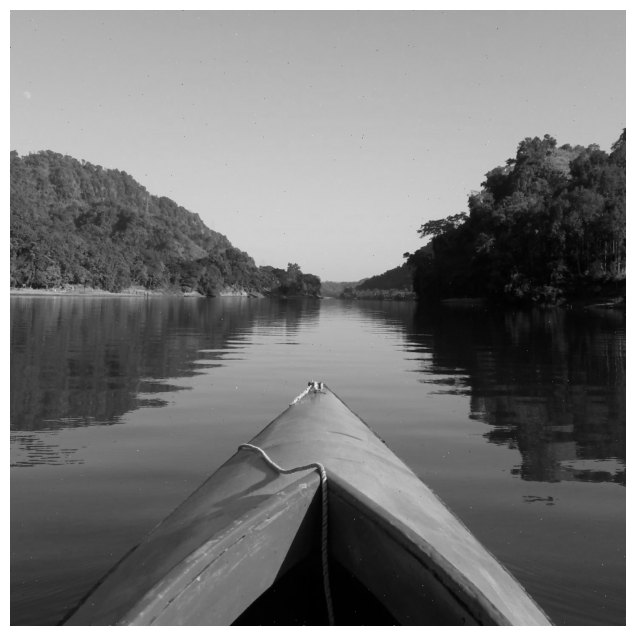

In [50]:
plt.figure(figsize=(10,8))
plt.imshow(img_filtered_median, cmap='gray')
plt.axis("off")
plt.show()

We got a super clean image after applying median filter.

For more information on structuring elements, check this out - https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py

#Unsharp masking

We can imagine each image as a sharp component added with a blurry component. In this formulation if we subtract the blurry component, we will get our sharp component. Addding this sharp component to the whole image will give the image a sharper look. This is the concept of unsharp masking. Lets see this in action -

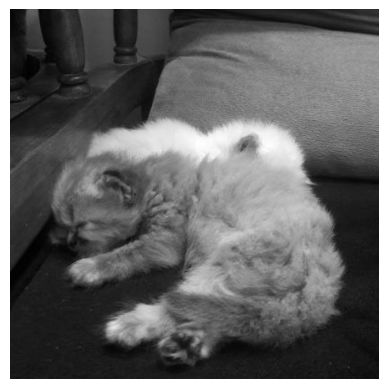

In [55]:
I = io.imread('/content/sample_2.jpg')
I = img_as_float(I)
I = color.rgb2gray(I)

plt.imshow(I, cmap='gray')
plt.axis('off')
plt.show()

Lets make this image sharper by subtracting the blurry component.

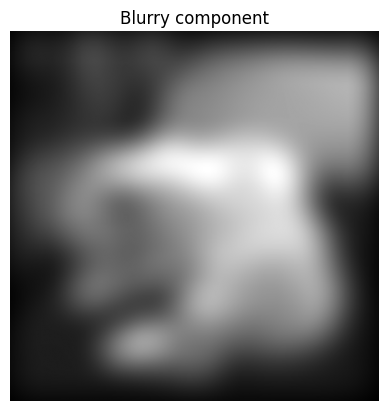

In [52]:
k = 75
spread = 20
kernel = gaussian_kernel(spread, k)

blurry_component = signal.correlate(I, kernel, mode='same', method='auto')

plt.imshow(blurry_component, cmap='gray')
plt.title("Blurry component")
plt.axis('off')
plt.show()

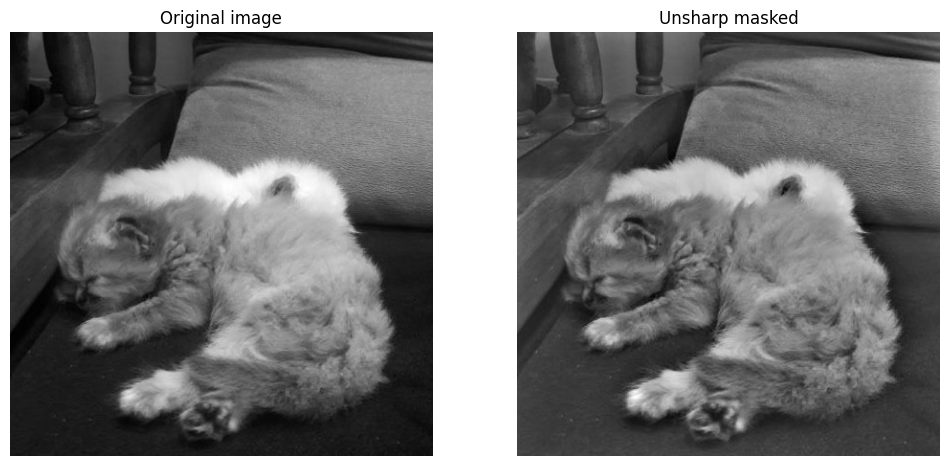

In [53]:
sharp_component = I - blurry_component
unsharp_masked = I + sharp_component

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(I, cmap='gray')
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(unsharp_masked, cmap='gray')
ax2.title.set_text("Unsharp masked")
ax2.axis("off")

plt.show()

The edges are more visible now.

#High boost filtering

High boost filtering is basically a stronger unsharp masking.

`Unsharp masked image = Image + k * Sharp component`, when k = 1

`High boost filtered image = Image + k * Sharp component`, when k > 1

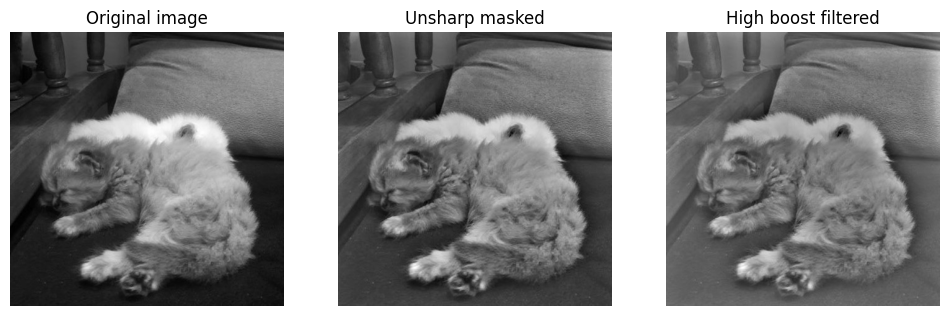

In [54]:
high_boost_filtered = I + 3.5*sharp_component

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(I, cmap='gray')
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(unsharp_masked, cmap='gray')
ax2.title.set_text("Unsharp masked")
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(high_boost_filtered, cmap='gray')
ax3.title.set_text("High boost filtered")
ax3.axis("off")

plt.show()